In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import os
import numpy as np

Loading audio files with Librosa

In [ ]:
scale_file = "/content/drive/MyDrive/audio/fold1/Ajam60.wav"
# load audio files with librosa

In [ ]:
ipd.Audio(scale_file)


In [ ]:
scale, sr = librosa.load(scale_file)

Mel filter banks

In [ ]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
filter_banks.shape

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks,
                         sr=sr,
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

Extracting Mel Spectrogram

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(y=scale, sr=sr, n_fft=2048, hop_length=512, n_mels=10)

In [ ]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
log_mel_spectrogram.shape

(10, 2587)

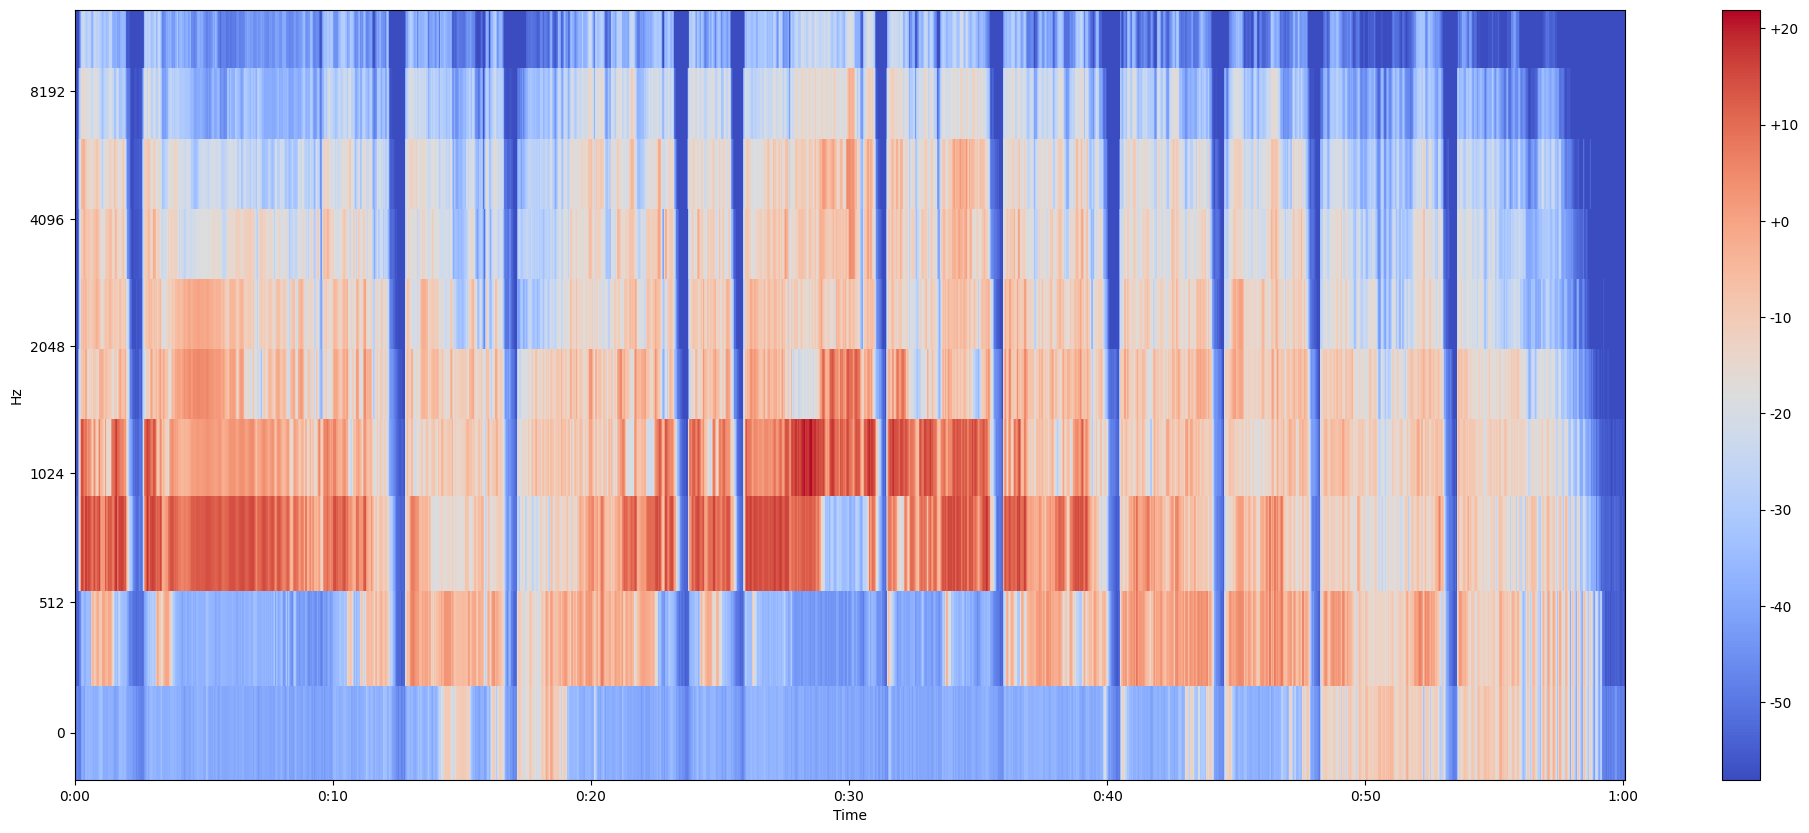

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram,
                         x_axis="time",
                         y_axis="mel",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

dosyadaki verilerin spektogramı

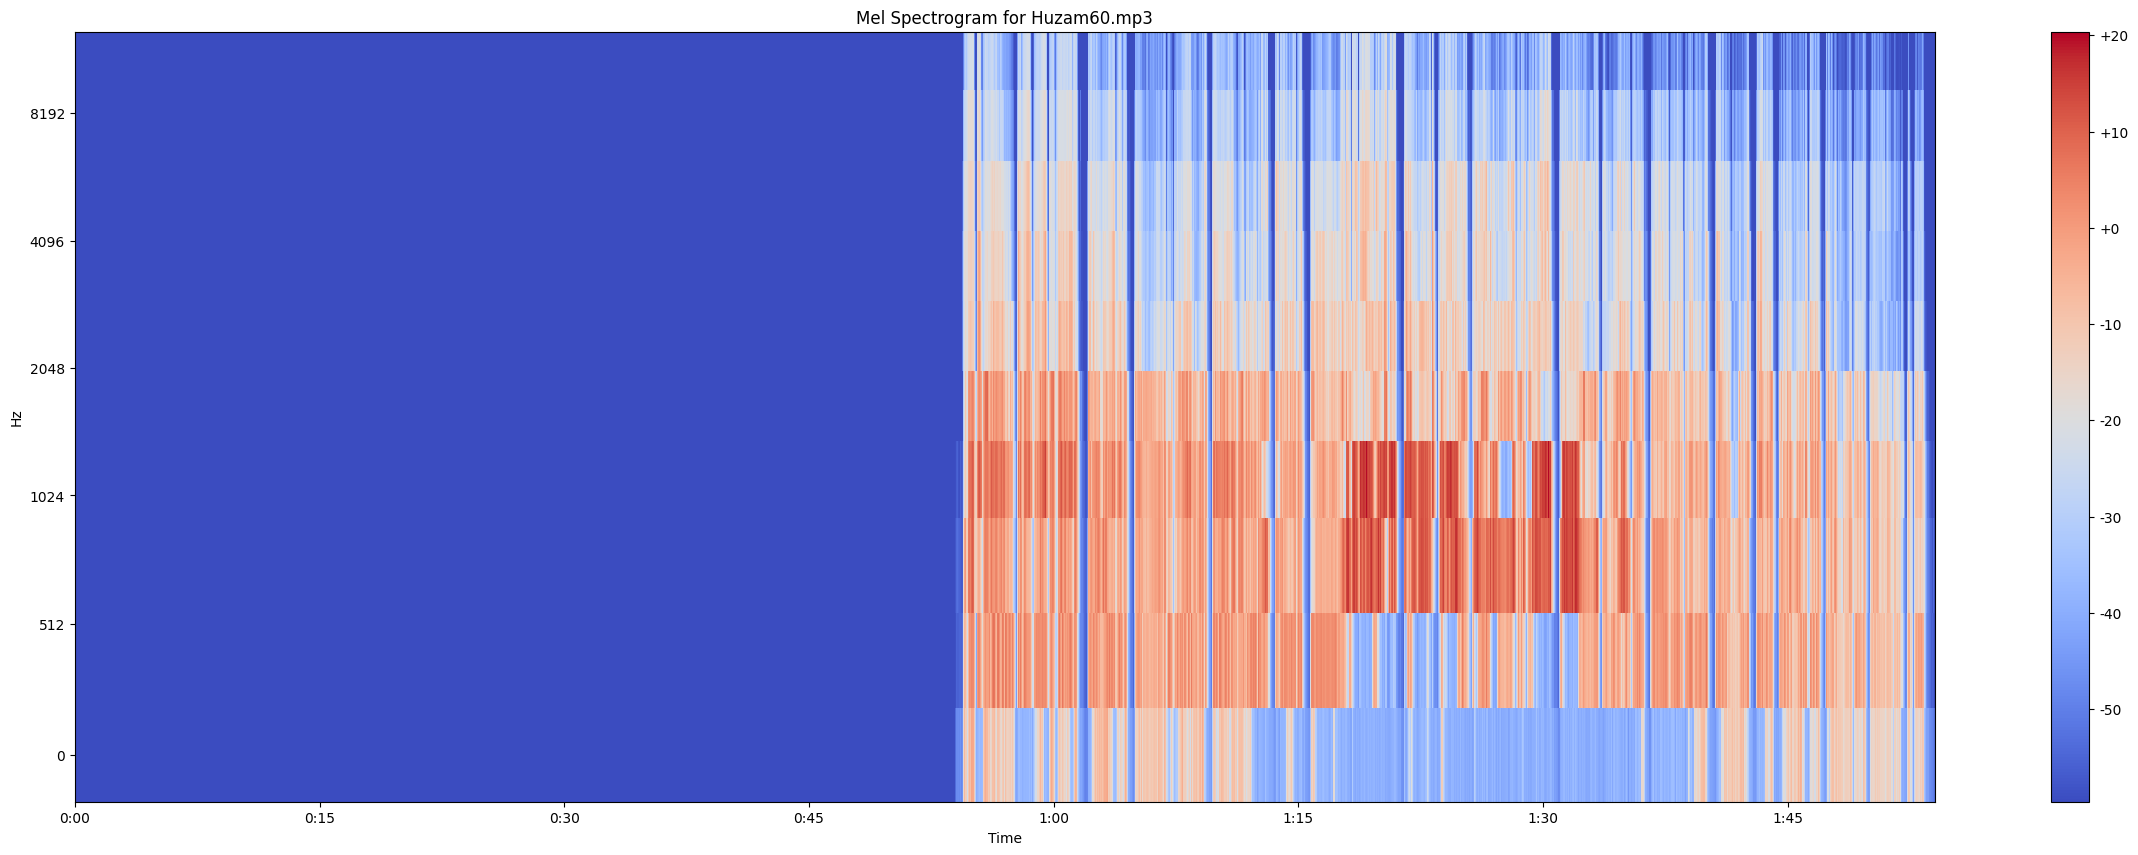

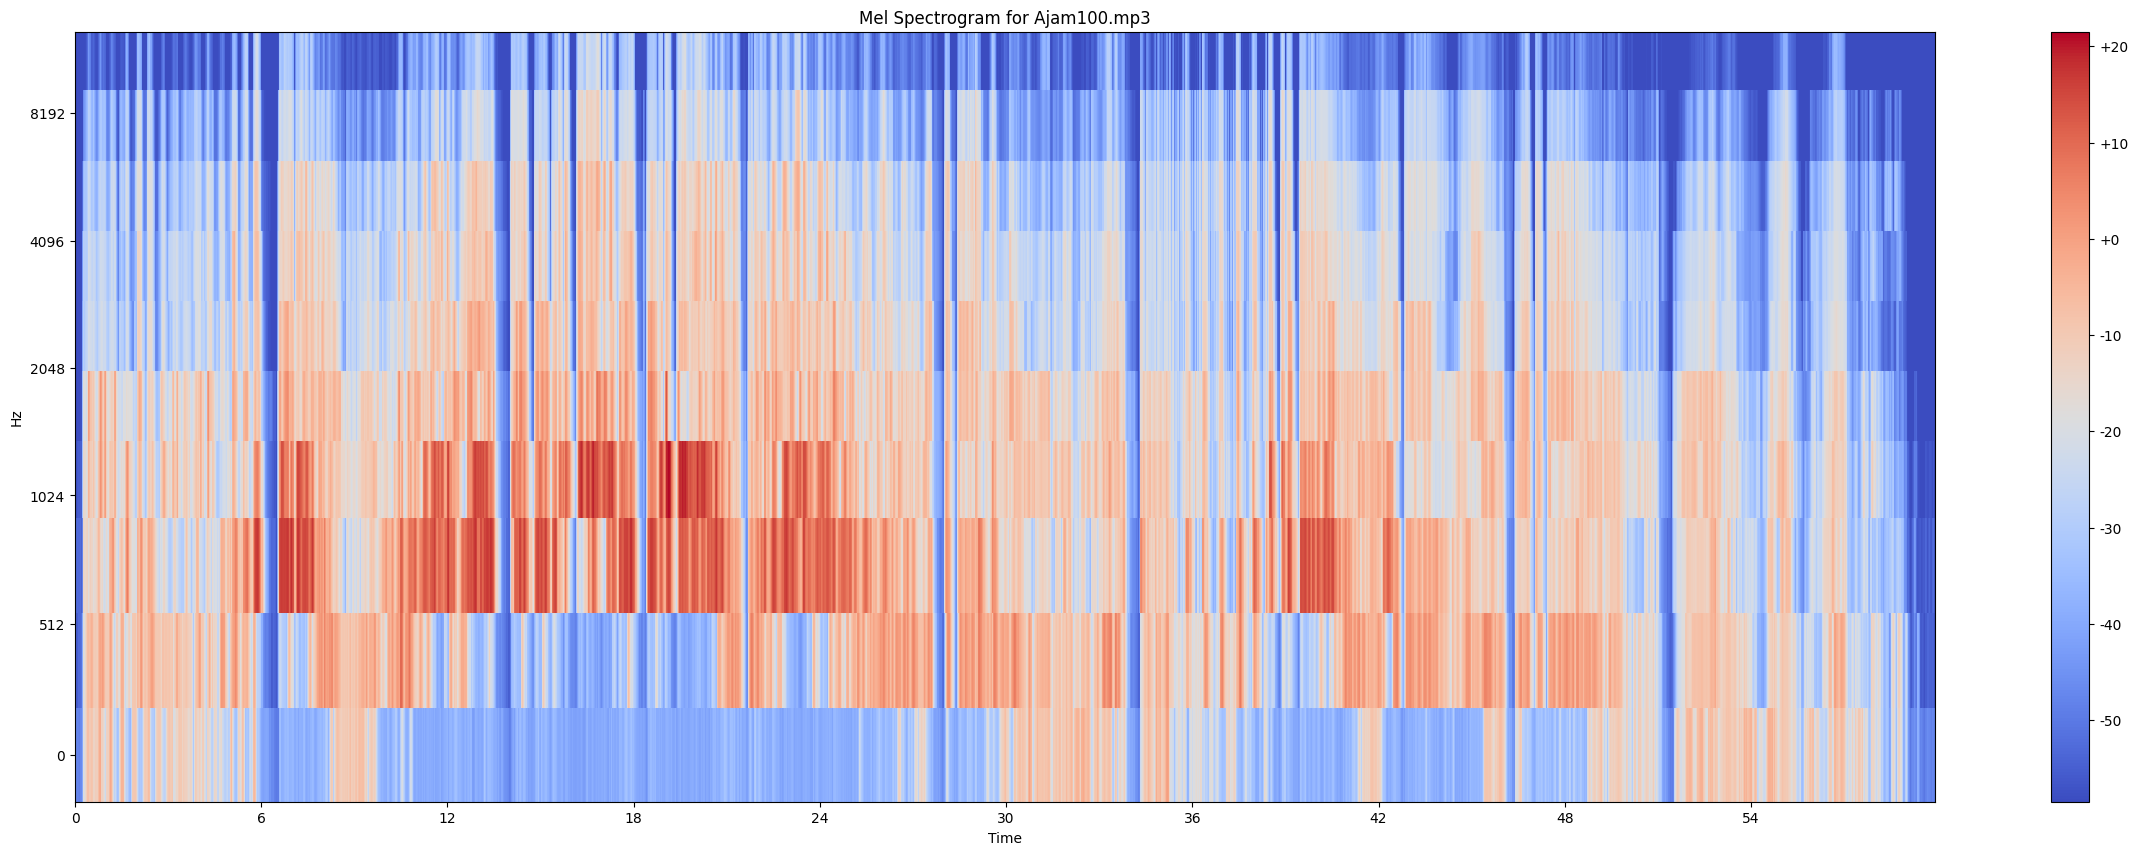

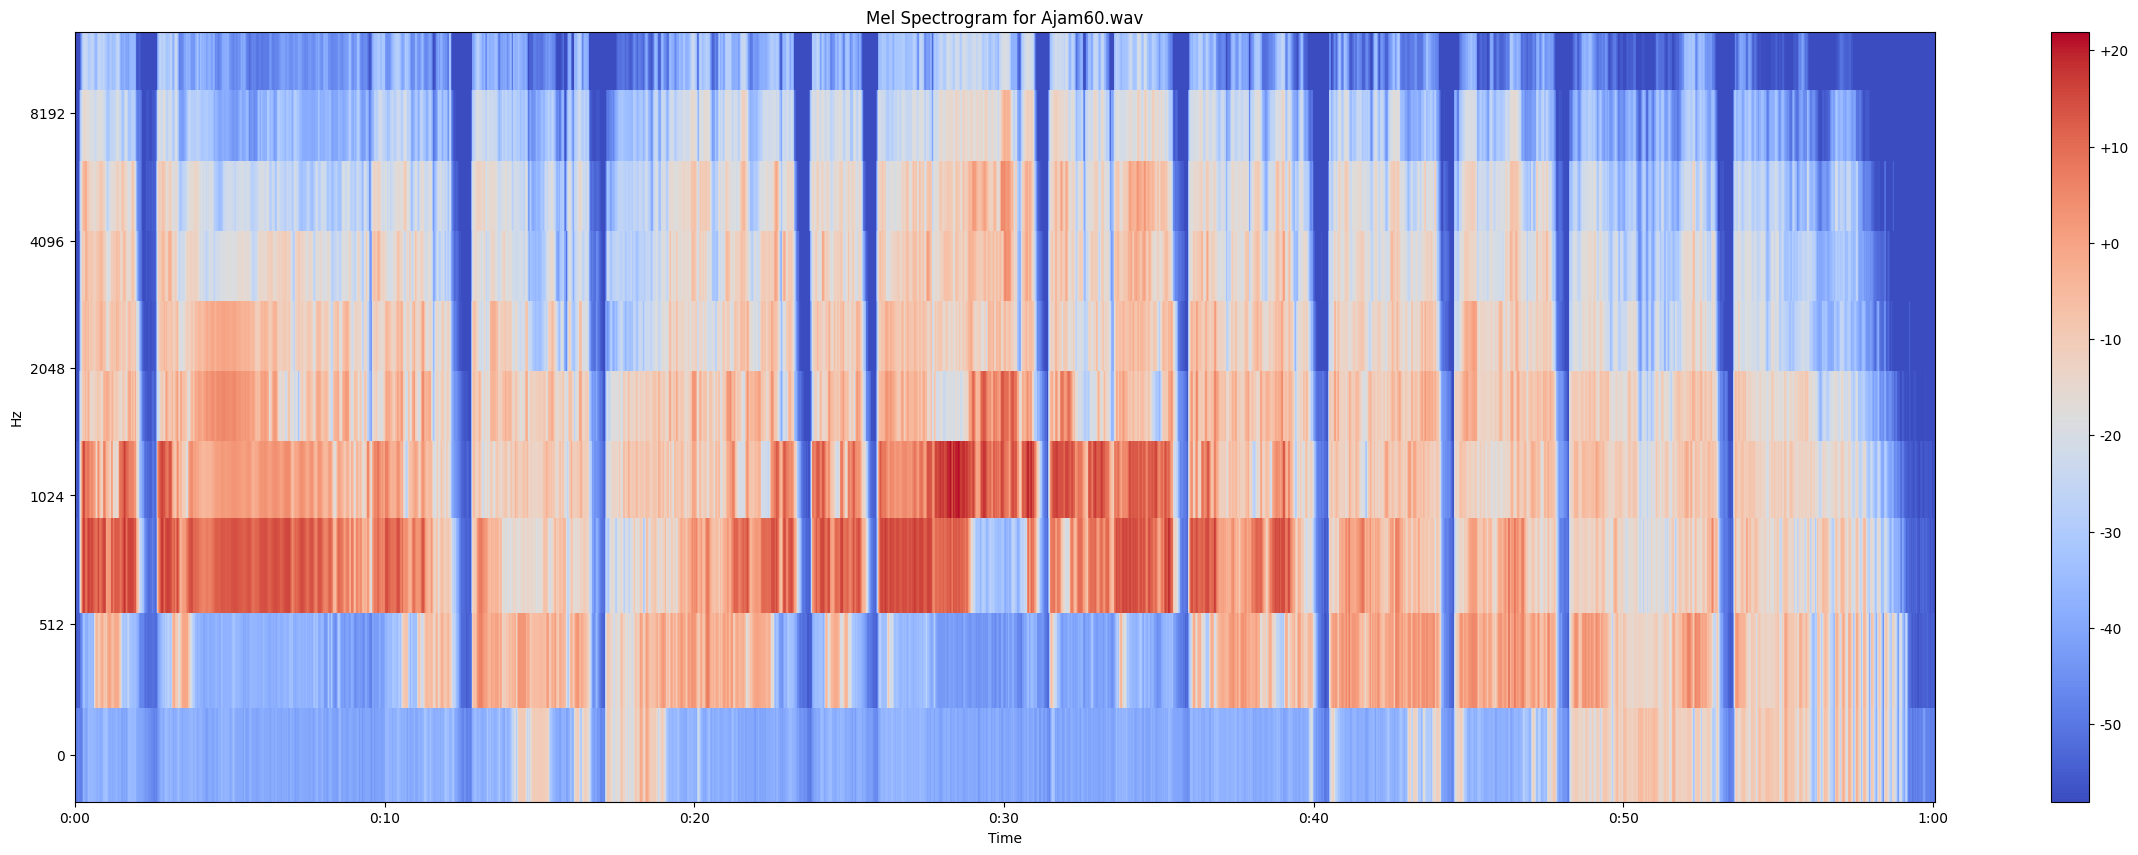

In [ ]:
# Ses dosyalarının bulunduğu klasör
audio_folder = "/content/drive/MyDrive/fold1"

# Klasördeki tüm ses dosyalarını al
audio_files = os.listdir(audio_folder)

# Mel filtre banklarını oluştur
n_fft = 2048
hop_length = 512
n_mels = 10
sr = 22050
filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=n_mels)

# Her ses dosyası için mel spektrogramlarını çıkart ve görselleştir
for audio_file in audio_files:
    audio_path = os.path.join(audio_folder, audio_file)
    scale, sr = librosa.load(audio_path)

    # Mel spektrogramunu hesapla
    mel_spectrogram = librosa.feature.melspectrogram(y=scale, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

    # Mel spektrogramunu görselleştir
    plt.figure(figsize=(30, 10))
    librosa.display.specshow(librosa.power_to_db(mel_spectrogram), x_axis="time", y_axis="mel", sr=sr)
    plt.colorbar(format="%+2.f")
    plt.title(f"Mel Spectrogram for {audio_file}")
    plt.show()


In [ ]:

# Ana klasör
dataset_folder = "/content/drive/MyDrive/dataset"

# Ana klasörün içindeki alt klasörlerin adlarını al
subfolders = [f for f in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, f))]

# Mel spektrogram parametreleri
n_fft = 2048
hop_length = 512
n_mels = 10
sr = 22050
# Her bir alt klasör için
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_folder, subfolder)
    output_folder = os.path.join(dataset_folder, f"{subfolder}_mel_spectrograms")
    os.makedirs(output_folder, exist_ok=True)

    # Alt klasörün içindeki müzik parçalarını al
    audio_files = [f for f in os.listdir(subfolder_path) if f.endswith(".wav")]

    # Her bir müzik parçası için
    for audio_file in audio_files:
        audio_path = os.path.join(subfolder_path, audio_file)
        audio, sr = librosa.load(audio_path)  # Örnekleme hızını koru

        # Mel spektrogramunu hesapla
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

        # Mel spektrogramunu kaydet
        output_filename = os.path.splitext(audio_file)[0] + ".png"  # Ses dosyasının adını değiştir
        output_path = os.path.join(output_folder, output_filename)
        librosa.display.specshow(log_mel_spectrogram, sr=sr, hop_length=hop_length)
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
        plt.close()

print("Mel spektrogramlar başarıyla oluşturuldu ve kaydedildi.")


Mel spektrogramlar başarıyla oluşturuldu ve kaydedildi.
